# Elisa McGraw
# Machine Learning Homework #1

1. [18 points] Explain the following concepts:

1) supervised learning
    - Training data contains desired solutions (labels).
    - Algorithm learns to map inputs to corresponding labeled outputs.
    - Goal is to generalize and make accurate predictions on new, unseen data.
2) unsupervised learning
    - Training data is unlabeled.
    - Algorithm identifies patterns, structures, or relationships within the data.
    - Goal is to discover underlying insights or groupings without prior knowledge.
3) online learning
    - The system can be trained incrementally with sequential data either individually or in mini batches
    - It is useful for systems with continus flow of data
    - It is also applicable for out-of-core learning, where the huge dataset cannot fit in the meemory of a server
4) batch learning (offline learning)
    - The system can't learn incrementally or update with new information as it becomes available
    - It must be trained using ALL the available data
    - With new data the system shall be trained from scratch using a full dataset
5) model-based learning
    - The system builds a model with the training examples; the model will be used to make predictions for new examples
    - Many popular machine learning algorithmms are model-based
6) instance-based learning
    - The system comparess new examples with existing examples (with labels) to make decision
    - No model needs to be trained but prediction can be slow because of comparing with all the existing examples

# Setup

First, let's make sure this notebook works well in both python 2 and 3, import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures:# Setup

In [40]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "fundamentals"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Exercise 2

Write a program to estimate the parameters for an unknown polynomial using the
polyfit() function of the numpy package.

1) Plot the noisy data and the polynomial you found in the same figure. You can use any value of m
from 2, 3, 4, 5, 6, where m is the degree of the polynomial.

/var/folders/hj/kn8tm82s075_k83wr31db5vc0000gn/T/ipykernel_9304/374989009.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


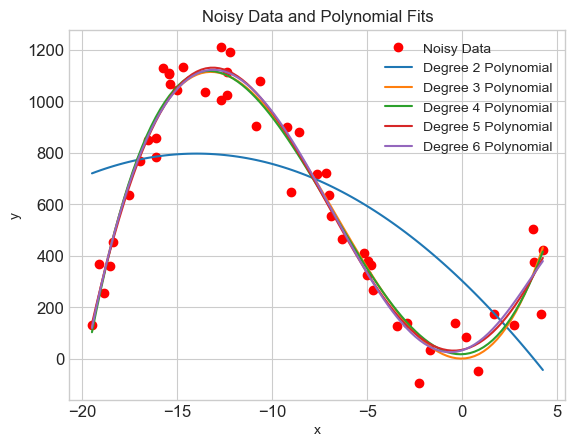

In [41]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
noise_scale = 100
number_of_samples = 50
x = 25*(np.random.rand(number_of_samples, 1) - 0.8)
y = 5 * x + 20 * x**2 + 1 * x**3 + noise_scale*np.random.randn(number_of_samples, 1)
plt.plot(x,y,'ro', label='Noisy Data')

# Plot the noisy data and the polynomial fits
degrees = [2, 3, 4, 5, 6]


for degree in degrees:
    coefficients = np.polyfit(x.flatten(), y.flatten(), degree)
    polynomial = np.poly1d(coefficients)
    x_range = np.linspace(x.min(), x.max(), 100)
    y_range = polynomial(x_range)
    plt.plot(x_range, y_range, label=f'Degree {degree} Polynomial')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Noisy Data and Polynomial Fits')
plt.legend()
plt.show()



2) Plot MSE versus m, for m = 1, 2, 3, 4, 5, 6, 7, 8 respectively. Identify the best choice of m and
explain why.

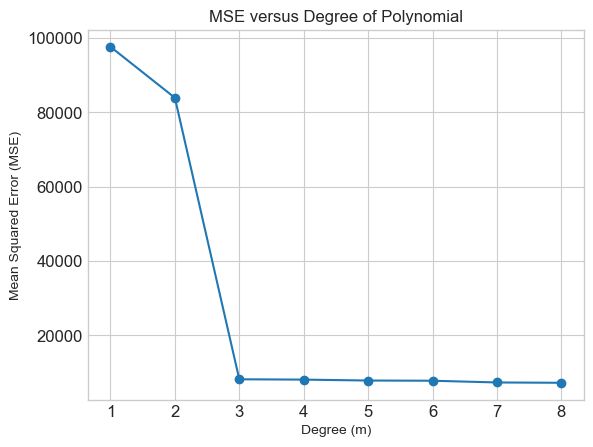

In [42]:
# Variables for question 2
degrees = [1, 2, 3, 4, 5, 6, 7, 8]
mse_values = []

for degree in degrees:
    coefficients = np.polyfit(x.flatten(), y.flatten(), degree)
    polynomial = np.poly1d(coefficients)
    y_pred = polynomial(x.flatten())
    mse = np.mean((y_pred - y.flatten()) ** 2)
    mse_values.append(mse)

plt.plot(degrees, mse_values, marker='o')
plt.xlabel('Degree (m)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE versus Degree of Polynomial')
plt.show()

The best choice of the degree for the polynomial can be determined by finding the degree that corresponds to the lowest Mean Squared Error (MSE) value.

3) Change variable noise_scale to 150, 200, 400, 600, 1000 respectively, re-run the algorithm and
plot the polynomials with the m found in 2). Discuss the impact of the noise scale on the
accuracy of the returned parameters. [You need to plot a figure as in 1) for each choice of
noise_scale.]

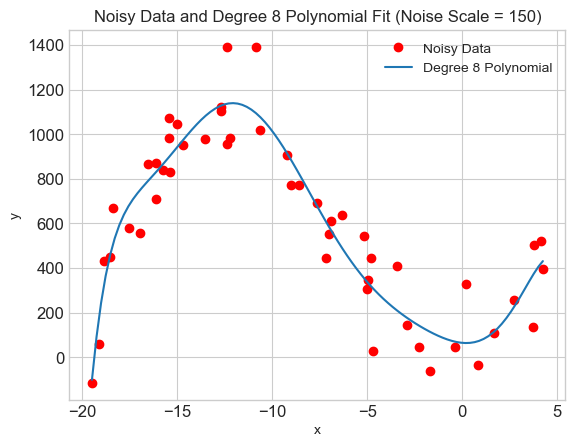

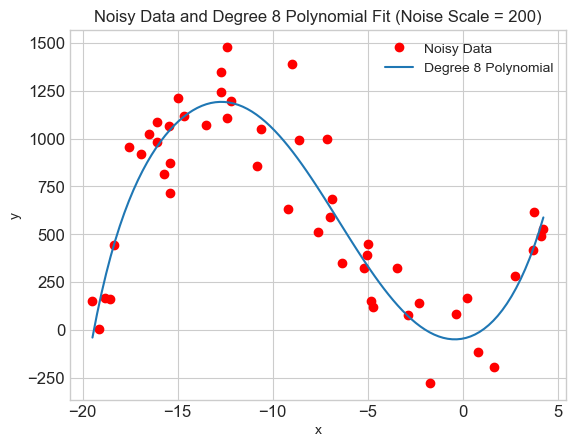

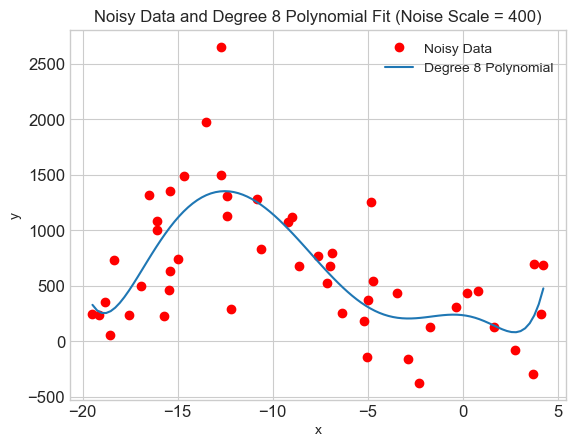

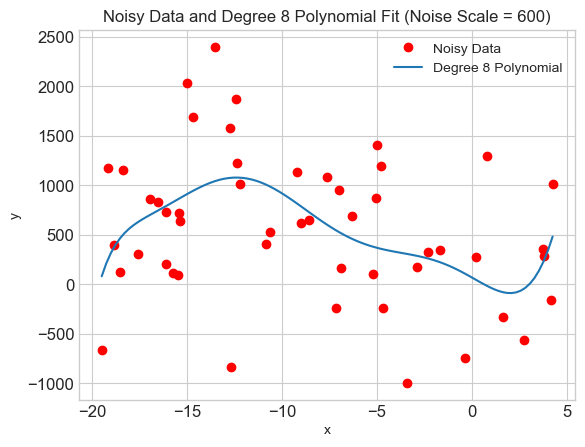

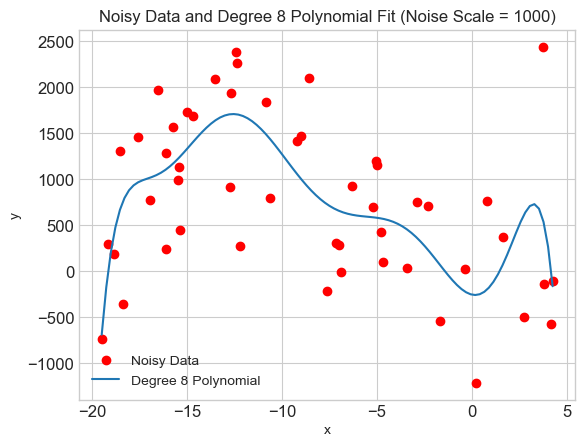

In [43]:

noise_scales = [150, 200, 400, 600, 1000]

for noise_scale in noise_scales:
    y = 5 * x + 20 * x**2 + 1 * x**3 + noise_scale * np.random.randn(number_of_samples, 1)

    best_degree = np.argmin(mse_values) + 1  # Best choice of m from question 2

    coefficients = np.polyfit(x.flatten(), y.flatten(), best_degree)
    polynomial = np.poly1d(coefficients)
    x_range = np.linspace(x.min(), x.max(), 100)
    y_range = polynomial(x_range)

    plt.plot(x, y, 'ro', label='Noisy Data')
    plt.plot(x_range, y_range, label=f'Degree {best_degree} Polynomial')

    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Noisy Data and Degree {best_degree} Polynomial Fit (Noise Scale = {noise_scale})')
    plt.legend()
    plt.show()

3) Change variable noise_scale to 150, 200, 400, 600, 1000 respectively, re-run the algorithm and
plot the polynomials with the m found in 2). Discuss the impact of the noise scale on the
accuracy of the returned parameters. [You need to plot a figure as in 1) for each choice of
noise_scale.]

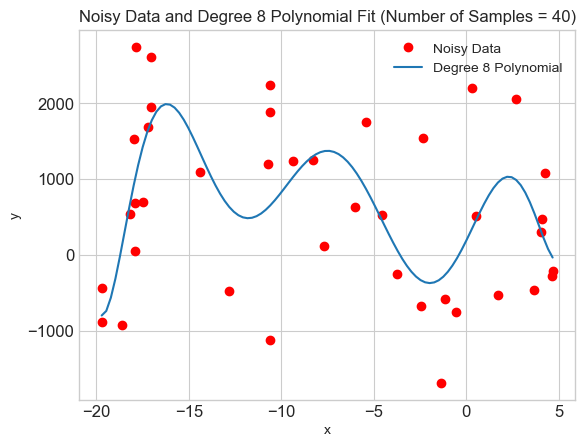

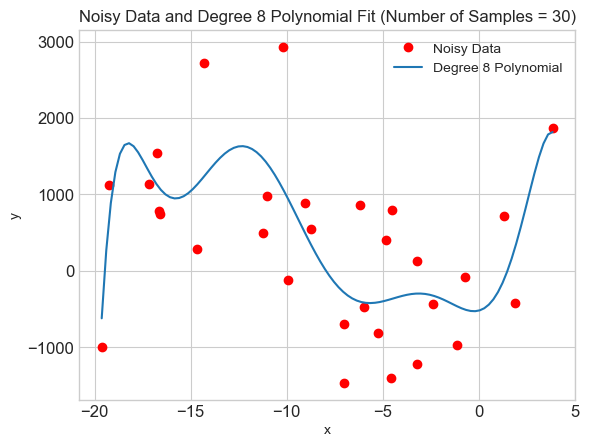

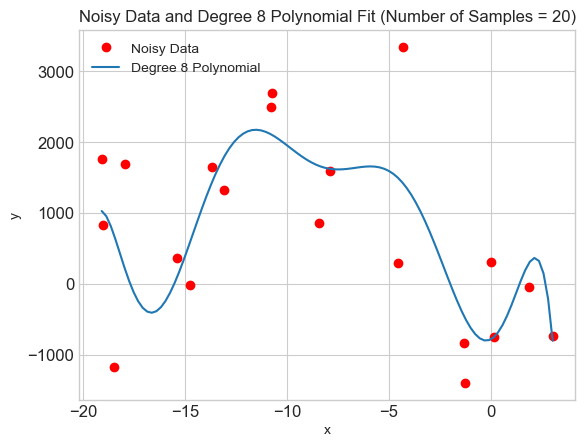

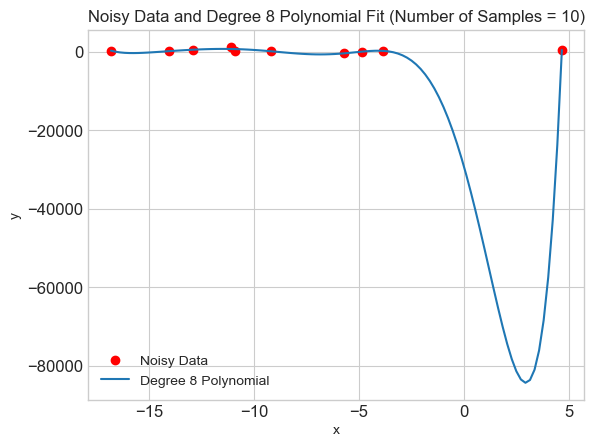

In [44]:
number_of_samples_list = [40, 30, 20, 10]

for number_of_samples in number_of_samples_list:
    x = 25 * (np.random.rand(number_of_samples, 1) - 0.8)
    y = 5 * x + 20 * x**2 + 1 * x**3 + noise_scale * np.random.randn(number_of_samples, 1)

    best_degree = np.argmin(mse_values) + 1  # Best choice of m from question 2

    coefficients = np.polyfit(x.flatten(), y.flatten(), best_degree)
    polynomial = np.poly1d(coefficients)
    x_range = np.linspace(x.min(), x.max(), 100)
    y_range = polynomial(x_range)

    plt.plot(x, y, 'ro', label='Noisy Data')
    plt.plot(x_range, y_range, label=f'Degree {best_degree} Polynomial')

    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Noisy Data and Degree {best_degree} Polynomial Fit (Number of Samples = {number_of_samples})')
    plt.legend()
    plt.show()